# Análise dos Dados do Airbnb - Rio de Janeiro

O Airbnb disponibiliza seus dados do site, para algumas das principais cidades do mundo. 
Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data/), é possível baixar uma grande quantidade de dados para desenvolver projetos.

Neste projeto irei analisar dados da cidade X e visualizar insights que podem ser extraídos a partir dos dados brutos.

## Obtenção dos dados

Os dados foram obtidos a partir do site do Airbnb.
O arquivo utilizado foi o listings.csv.gz, referente à cidade do Rio de Janeiro. [Acesse aqui](http://insideairbnb.com/get-the-data/)

In [8]:
import pandas as pd
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2023-03-28/data/listings.csv.gz")

In [10]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20230328184454,2023-03-29,city scrape,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Please note that elevated rates applies for Ne...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,...,4.90,4.77,4.65,NaN,f,1,1,0,0,1.86
1,200568,https://www.airbnb.com/rooms/200568,20230328184454,2023-03-29,city scrape,30m of Ipa Beach e fins de semana special price !,"ATENÇÃO, a eletricidade e gás são pagas pelo h...","Praia, restaurantes, boates, centros culturais...",https://a0.muscache.com/pictures/0586b774-3641...,980805,...,4.97,4.95,4.73,NaN,f,6,4,2,0,1.45
2,202778,https://www.airbnb.com/rooms/202778,20230328184454,2023-03-29,city scrape,Best Studio in Rio - Copacabana,If you looking to staying in a beautiful moder...,Besides Copacabana been the most famous touris...,https://a0.muscache.com/pictures/2015102/18eea...,529105,...,4.94,4.85,4.68,NaN,f,3,3,0,0,1.58
3,24480,https://www.airbnb.com/rooms/24480,20230328184454,2023-03-29,city scrape,"Nice and cozy near Ipanema Beach, w/ home office","My studio is located in the best of Ipanema, t...","The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/miso/Hosting-...,99249,...,4.90,4.97,4.56,NaN,f,3,3,0,0,0.56
4,203674,https://www.airbnb.com/rooms/203674,20230328184454,2023-03-29,city scrape,"IPANEMA PENTHOUSE,JACUZZI + STUNNING CRISTO VI...",RETRO CHIC IN A TRULY BREATHTAKING SETTING!<br...,Ipanema is almost like a small kingdom set apa...,https://a0.muscache.com/pictures/2421b3ee-0f2e...,999125,...,4.91,4.95,4.44,NaN,f,1,1,0,0,0.36


### Dicionário

In [11]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

## Análise dos dados

In [12]:
# identificar o volume de dados do DataFrame
print("Quantidade de Entradas:\t {}".format(df.shape[0]))
print("Quantidade de Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
print("Tipo de dados das colunas")
display(df.dtypes)

Quantidade de Entradas:	 30476
Quantidade de Variáveis:	 75

Tipo de dados das colunas


id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

### Conclusão

O Dataset possui 75 variáveis e 30476 rgistros/entradas. 

## Porcentagem os valores ausentes

In [16]:
df.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               7504
Length: 75, dtype: int64

In [18]:
df.isnull().sum() / df.shape[0]

id                                              0.000000
listing_url                                     0.000000
scrape_id                                       0.000000
last_scraped                                    0.000000
source                                          0.000000
                                                  ...   
calculated_host_listings_count                  0.000000
calculated_host_listings_count_entire_homes     0.000000
calculated_host_listings_count_private_rooms    0.000000
calculated_host_listings_count_shared_rooms     0.000000
reviews_per_month                               0.246227
Length: 75, dtype: float64

In [24]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                         1.000000
neighbourhood_group_cleansed    1.000000
bathrooms                       1.000000
calendar_updated                1.000000
host_about                      0.519261
                                  ...   
maximum_nights_avg_ntm          0.000000
host_verifications              0.000000
has_availability                0.000000
availability_30                 0.000000
id                              0.000000
Length: 75, dtype: float64

In [28]:
(df[['host_name']].isnull().sum() / df.shape[0]).sort_values()

host_name    0.000098
dtype: float64

In [29]:
(df[['name']].isnull().sum() / df.shape[0]).sort_values()

name    0.000591
dtype: float64

In [30]:
# eliminar todas as entradas onde existam valores ausentes em `host_name`
df_row_dropna = df.dropna(subset=['host_name'], axis=0)

# eliminar todas as entradas onde existam valores ausentes em `name`
df_row_dropna = df.dropna(subset=['name'], axis=0)

### Conclusões

- As colunas license, neighbourhood_group_cleansed, bathrooms,calendar_updated possui 100% dos seus valores faltantes. 
- A coluna reviews_per_month possui 24,63% de seus valores faltantes. Essa coluna se refere aos comentários feitos no mês. Portanto, algumas acomodações nao receberam avaliações e/ou as acomodações ainda não receberam reservas.
- A coluna host_about possui 0,52% dos valores faltantes.

- A coluna host_name e name não possuem muita representatividade de valores nulos em nosso dataset. 

Ao comparar os valores de antes e depois da eliminação de valores ausentes em host_name, temos:

In [33]:
# comparar o antes e o depois de `host_name`
print("Antes:\t{}".format(df.shape))
print("Depois:\t{}".format(df_row_dropna.shape))
print("Diferença:\t{}".format(df.shape[0] - df_row_dropna.shape[0]))

Antes:	(30476, 75)
Depois:	(30458, 75)
Diferença:	18


## Quantidade de valores nulos em cada coluna

In [34]:
df.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               7504
Length: 75, dtype: int64

Criando um histograma para visualizar essas informações:

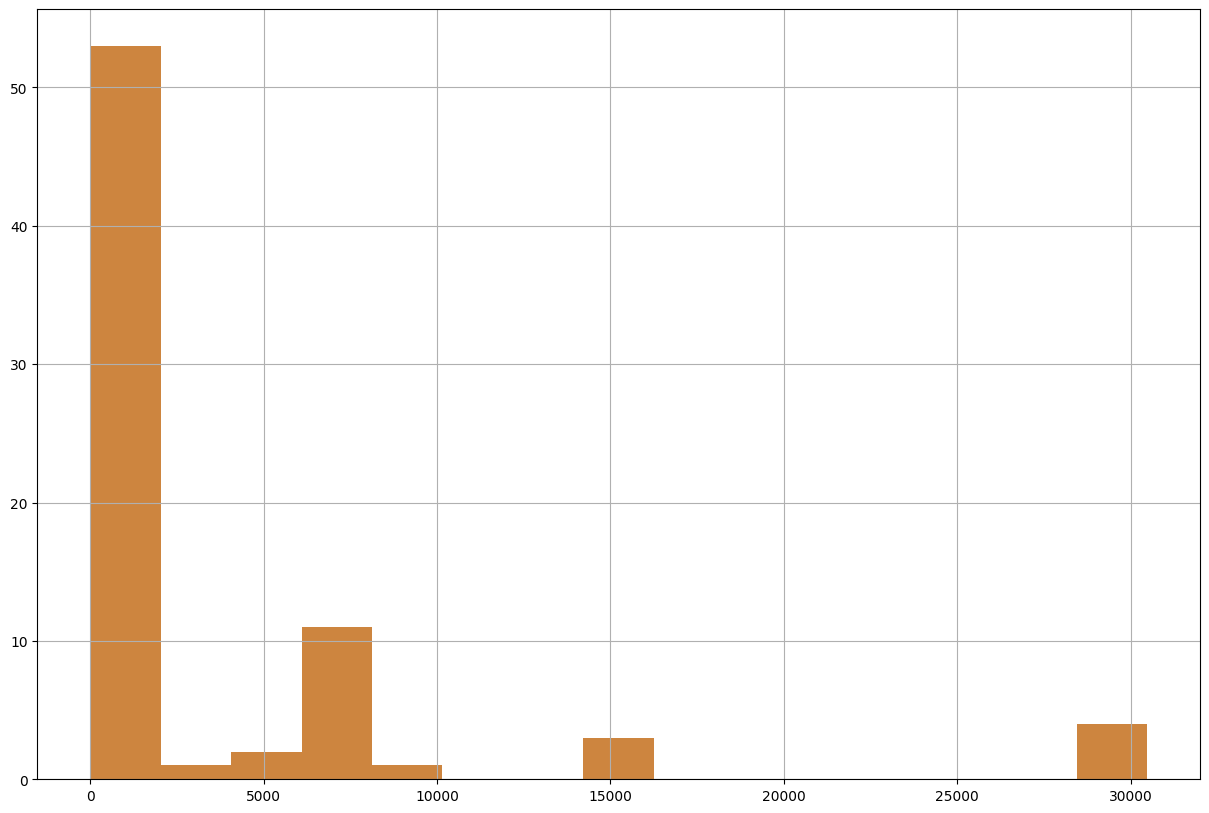

In [35]:
import matplotlib.pyplot as plt

%matplotlib inline

# plotar o histograma das variáveis numéricas
df.isnull().sum().hist(bins=15, figsize=(15,10), color = "#CD853F");

## Calculo da média dos preços de aluguel

In [36]:
df['price']

0          $350.00
1          $100.00
2          $266.00
3          $624.00
4        $1,899.00
           ...    
30471      $242.00
30472      $118.00
30473    $1,126.00
30474    $1,126.00
30475      $839.00
Name: price, Length: 30476, dtype: object

In [37]:
df['price'].describe()

count       30476
unique       2086
top       $300.00
freq          710
Name: price, dtype: object

## Tipo de imóvel mais alugado no Rio de Janeiro

Exibindo esses valores em porcentagem:

In [41]:
# mostrar a porcentagem de cada tipo de imóvel disponível
tipos = df.room_type.value_counts()
tipos

Entire home/apt    23753
Private room        6167
Shared room          504
Hotel room            52
Name: room_type, dtype: int64

In [42]:
quarto_percentual = tipos / df.shape[0];
pd.DataFrame(quarto_percentual).style.format('{:.2%}')

,room_type
Entire home/apt,77.94%
Private room,20.24%
Shared room,1.65%
Hotel room,0.17%


Portanto, dos imóveis disponíveis no Dataframe da cidade do Rio de Janeiro, aproximanente:
- 77.94% são de cadas ou apartamento alugados
- 20.24% são de quartos privativos
- 1.65% são de quartos compartilhados
- 0.17% são quartos de hotel